# Libraries

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# 1. Support Functions

In [15]:
from config import activities_li, activities_mn, activities_ni
import synthesis
from plotting import plot_activity_impact_changes

# 3. Synthesis of results

In [16]:
# File paths
baseline_csv = "./outputs/combined_results/combined_results_remindSSP1_baseline.csv"
vsi_csv = "./outputs/combined_results/combined_results_remindSSP1_VSI_interpolated.csv"

# Run the analysis
results_df = synthesis.analyze_impacts(baseline_csv, vsi_csv, activities_ni)

In [17]:
results_df

,Activity,Location,Impact Category,Baseline 2025,Baseline 2040,Baseline Change,Baseline % Change,VSI 2025,VSI 2040,VSI Change,VSI % Change,VSI to baseline change,VSI to baseline change %
0,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'terrestrial ecotoxici...",0.003697,0.003379,-3.184311e-04,-8.613370,0.003697,0.002504,-1.193732e-03,-32.284953,-8.747536e-04,-23.671583
1,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'natural land transfor...",0.000834,0.000781,-5.278811e-05,-6.331233,0.000834,0.000781,-5.277166e-05,-6.329471,-1.125935e-08,0.001763
2,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'photochemical oxidant...",0.611967,0.609975,-1.991887e-03,-0.325490,0.611967,0.038975,-5.729917e-01,-93.631185,-5.709996e-01,-93.305696
3,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'human toxicity', 'HTP...",11.223101,10.514623,-7.084784e-01,-6.312679,11.223158,9.156266,-2.066893e+00,-18.416318,-1.358357e+00,-12.103639
4,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'marine eutrophication...",0.006788,0.005760,-1.027502e-03,-15.137272,0.006788,0.005477,-1.311009e-03,-19.313460,-2.833447e-04,-4.176188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'ionising radiation', ...",11.118805,10.799093,-3.197126e-01,-2.875422,11.118802,10.799100,-3.197024e-01,-2.875331,7.562530e-06,0.000091
176,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'fossil depletion', 'F...",7.616452,7.064038,-5.524146e-01,-7.252912,7.616504,7.064091,-5.524122e-01,-7.252832,5.353858e-05,0.000080
177,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'freshwater ecotoxicit...",2.852218,2.866234,1.401586e-02,0.491402,2.852221,2.862834,1.061226e-02,0.372070,-3.400464e-03,-0.119332
178,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'marine ecotoxicity', ...",2.642531,2.654227,1.169506e-02,0.442570,2.642537,2.499715,-1.428214e-01,-5.404709,-1.545112e-01,-5.847280


In [18]:
# Define the list of SSP scenarios to analyze
ssp_scenarios = ["SSP1", "SSP2", "SSP5"]

results_dict = {}

for ssp in ssp_scenarios:
    baseline_csv = f"./outputs/combined_results/combined_results_remind{ssp}_baseline.csv"
    vsi_csv = f"./outputs/combined_results/combined_results_remind{ssp}_VSI_interpolated.csv"

    results_df = synthesis.analyze_impacts(baseline_csv, vsi_csv, activities_ni)

    # Store in dictionary
    results_dict[ssp] = results_df

In [19]:
# Dictionary to store the activity groups
activity_groups = {
    "Nickel": activities_ni,
    "Lithium": activities_li,
    "Manganese": activities_mn
}

# Define the list of SSP scenarios to analyze
ssp_scenarios = ["SSP1", "SSP2", "SSP5"]

# List to collect results for a consolidated DataFrame
all_results = []

for ssp in ssp_scenarios:
    for group_name, activities in activity_groups.items():
        baseline_csv = f"./outputs/combined_results/combined_results_remind{ssp}_baseline.csv"
        vsi_csv = f"./outputs/combined_results/combined_results_remind{ssp}_VSI_interpolated.csv"

        print(f"Processing {ssp} - {group_name}...")

        # Run the analysis
        results_df = synthesis.analyze_impacts(baseline_csv, vsi_csv, activities)

        # Add SSP and Activity Group as columns
        results_df["SSP"] = ssp
        results_df["Activity Group"] = group_name

        # Append to results list
        all_results.append(results_df)

# Combine all results into a single DataFrame
final_results_df = pd.concat(all_results, ignore_index=True)

# Save the DataFrame for future use
final_results_df.to_csv("./outputs/comparative_results/final_impact_changes.csv", index=False)

Processing SSP1 - Nickel...
Processing SSP1 - Lithium...
Processing SSP1 - Manganese...
Processing SSP2 - Nickel...
Processing SSP2 - Lithium...
Processing SSP2 - Manganese...
Processing SSP5 - Nickel...
Processing SSP5 - Lithium...
Processing SSP5 - Manganese...


In [31]:
final_results_df.to_csv('check.csv')

In [21]:
def preprocess_results(final_results_df):
    """
    Prepares the final_results_df for plotting by:
    - Rounding 'VSI to baseline change %' to 1 decimal place
    - Extracting only the middle term from 'Impact Category'
    - Ensuring numeric data types for proper plotting
    """
    df_cleaned = final_results_df.copy()

    # Ensure 'VSI to baseline change %' is numeric and round it
    df_cleaned["VSI to baseline change %"] = pd.to_numeric(
        df_cleaned["VSI to baseline change %"], errors="coerce"
    ).round(1)

    # Extract only the middle term from impact category (e.g., 'terrestrial acidification')
    df_cleaned["Impact Short"] = df_cleaned["Impact Category"].apply(
        lambda x: eval(x)[1] if isinstance(x, str) else x[1]
    )

    return df_cleaned


In [22]:
final_results_df = preprocess_results(final_results_df)

# 3. Visualisation

In [12]:
activity_to_plot = 'platinum group metal mine operation, ore with high palladium content'

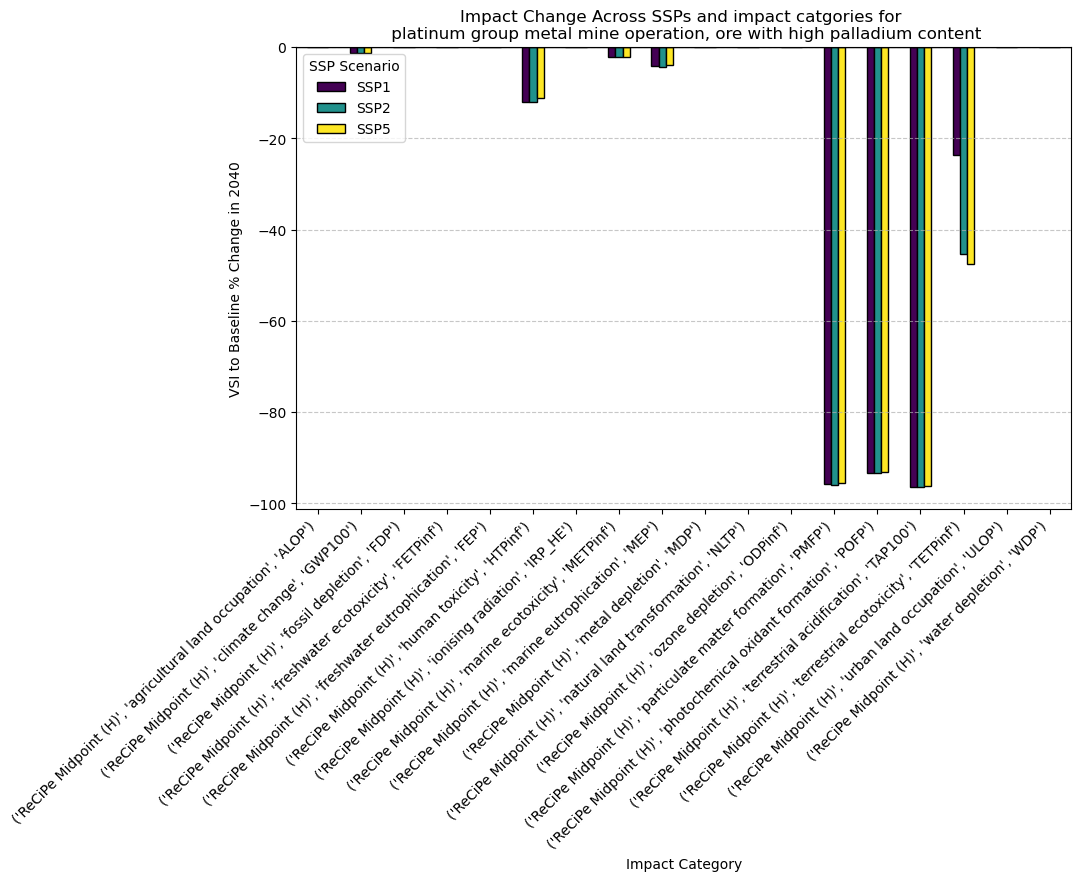

In [23]:
# Example Usage:
plot_activity_impact_changes(activity_to_plot, final_results_df)

In [24]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Pivot for grouped bar chart
        df_pivot = df_filtered.pivot(index="Impact Short", columns="SSP", values="VSI to baseline change %")

        # Plot in subplot
        df_pivot.plot(kind="bar", colormap="viridis", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()

# Example


## 3.1. Nickel

In [25]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    - Fixes duplicate index issue using `groupby().mean().unstack()`
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Fix duplicate entries by using groupby().mean()
        df_grouped = df_filtered.groupby(["Impact Short", "SSP"])["VSI to baseline change %"].mean().unstack()

        # Plot in subplot
        df_grouped.plot(kind="bar", colormap="viridis", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()



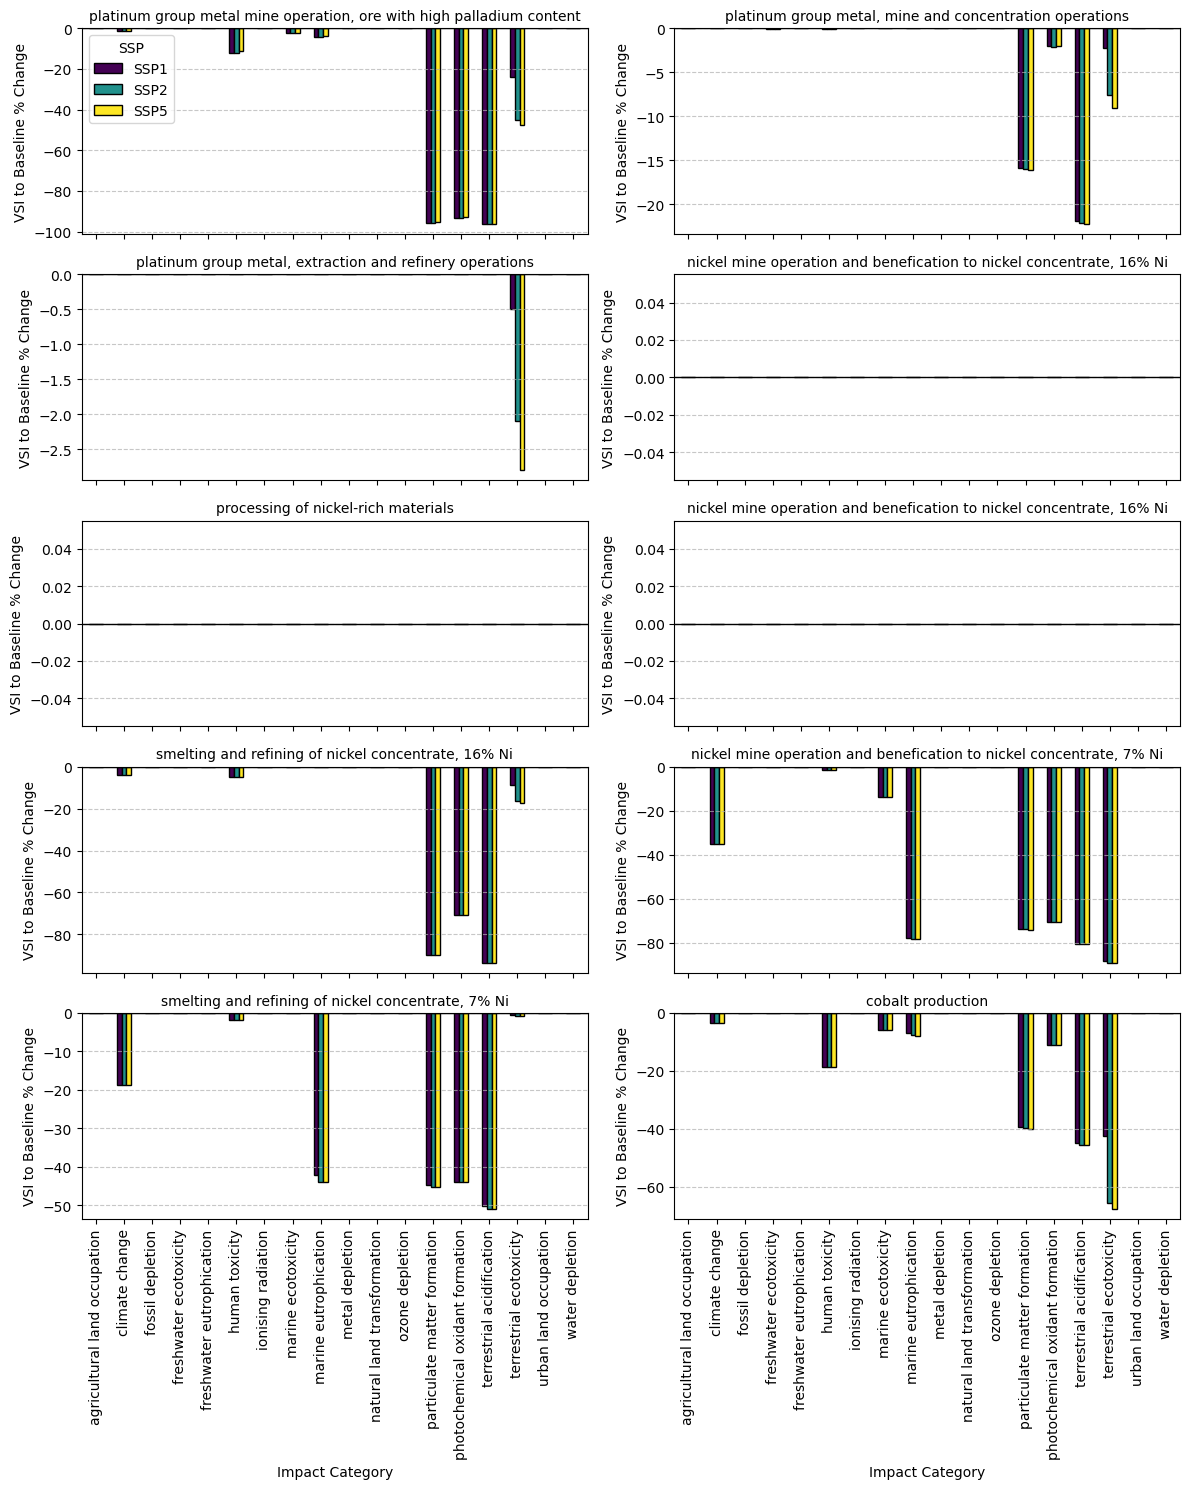

In [26]:
# Example
plot_all_activities_together(activities_ni)

## 3.2. Lithium

In [27]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    - Fixes duplicate index issue using `groupby().mean().unstack()`
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Fix duplicate entries by using groupby().mean()
        df_grouped = df_filtered.groupby(["Impact Short", "SSP"])["VSI to baseline change %"].mean().unstack()

        # Plot in subplot
        df_grouped.plot(kind="bar", colormap="Greens", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()



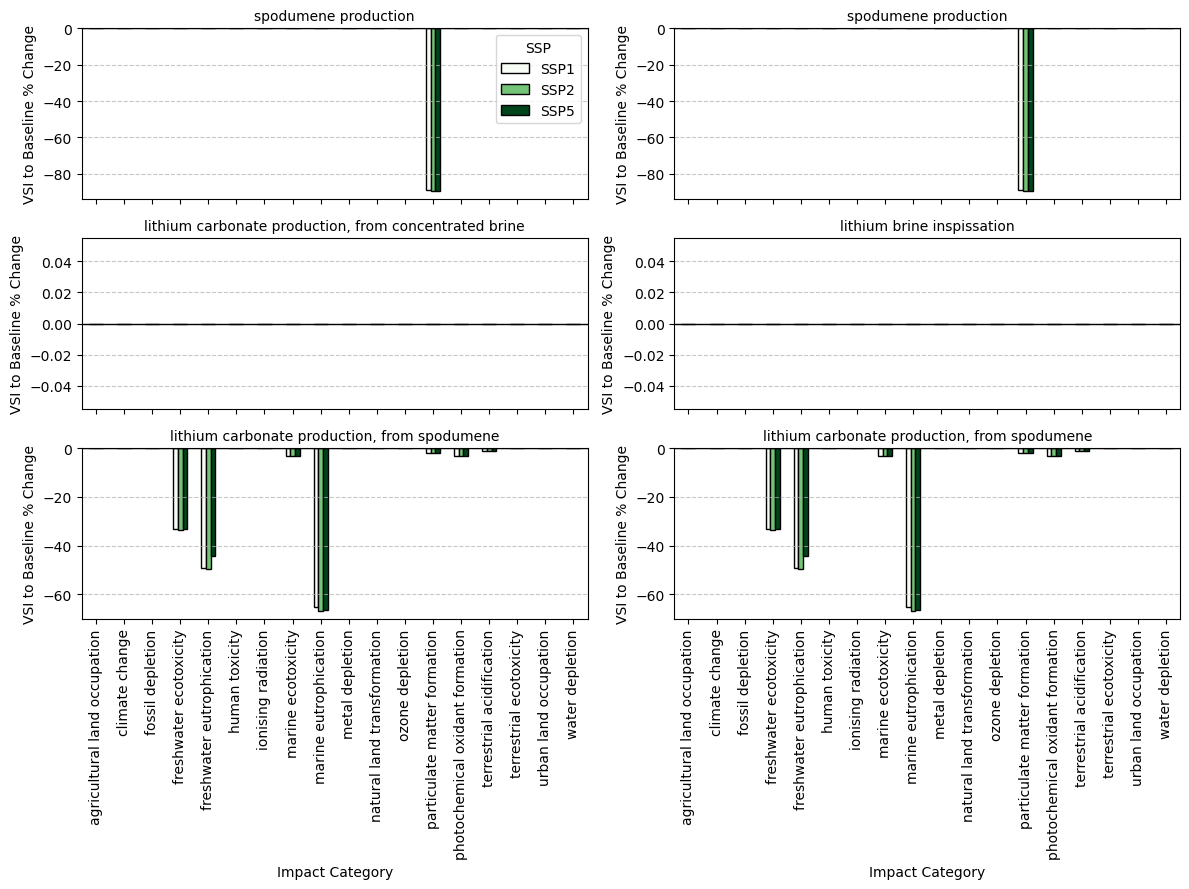

In [28]:
# Example
plot_all_activities_together(activities_li)

## 3.3. Manganese

In [29]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    - Fixes duplicate index issue using `groupby().mean().unstack()`
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Fix duplicate entries by using groupby().mean()
        df_grouped = df_filtered.groupby(["Impact Short", "SSP"])["VSI to baseline change %"].mean().unstack()

        # Plot in subplot
        df_grouped.plot(kind="bar", colormap="Oranges", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()

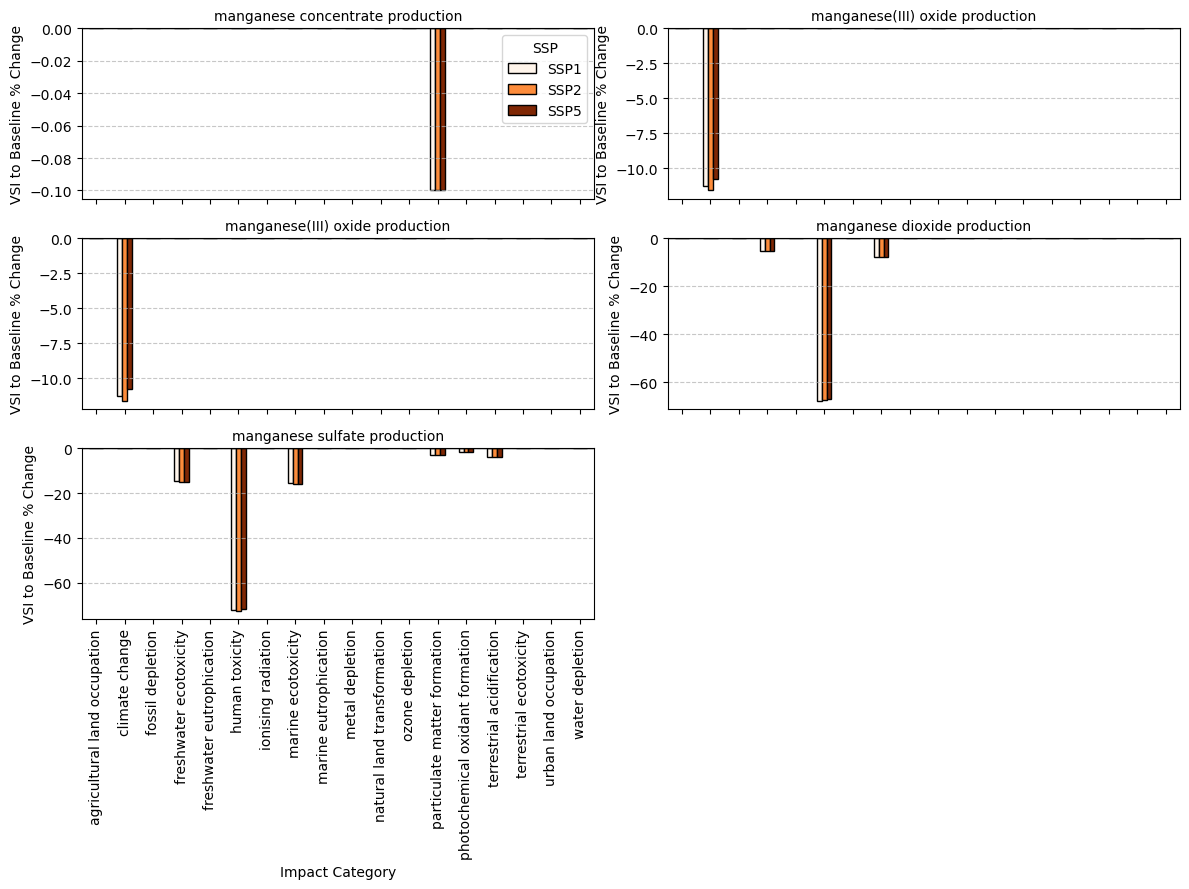

In [30]:
# Example
plot_all_activities_together(activities_mn)

In [35]:

def plot_commodities_together(commodities_dict):
    """
    Plots VSI to Baseline % Change across SSPs for all commodities in a single figure.
    Each commodity gets a unique color palette.
    
    :param commodities_dict: Dictionary where keys are commodity names and values are lists of (activity, location)
    """
    color_palettes = {
        "Nickel": "Blues",
        "Manganese": "Oranges",
        "Lithium": "Greens"
    }
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for commodity, activity_list in commodities_dict.items():
        palette = sns.color_palette(color_palettes.get(commodity, "viridis"), n_colors=len(activity_list))
        
        for i, (activity_name, location) in enumerate(activity_list):
            df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()
            
            if df_filtered.empty:
                continue
            
            df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(
                lambda x: eval(x)[1] if isinstance(x, str) else x[1]
            )
            
            df_grouped = df_filtered.groupby(["Impact Short", "SSP"])["VSI to baseline change %"].mean().unstack()
            df_grouped.plot(kind="bar", colormap=palette[i], edgecolor="black", ax=ax, legend=False, alpha=0.7)
            
    ax.set_ylabel("VSI to Baseline % Change")
    ax.set_title("Comparison of Commodities - VSI to Baseline Change")
    ax.axhline(0, color='black', linewidth=1)
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xlabel("Impact Category")
    
    plt.legend(commodities_dict.keys(), title="Commodity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
commodities_dict = {
    "Nickel": activities_ni,
    "Manganese": activities_mn,
    "Lithium": activities_li
}

TypeError: 'tuple' object is not callable

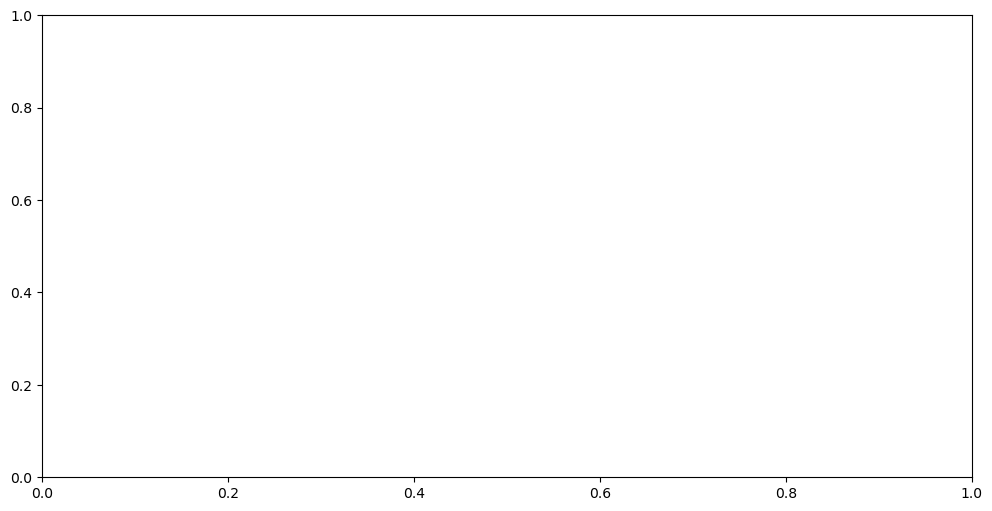

In [39]:
plot_commodities_together(commodities_dict)